In [410]:
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [676]:
def filter_results(path, test="=== [Accuracy] H0: DP vs. ReuseKNN", method="UserKNN+Reuse", k=10, kind="one-tailed", q=None):
    file = open(path, 'r')
    line_cnt = 0
    filter_on = False
    q_filter_on = False
    q_case = False
    print("=== %s === " % test)
    results = defaultdict(list)
    for line in file.readlines():
        # TODO privacy vs. privacy risk
        if line.startswith("=== ["):
            if test in line:
                #print(line)
                filter_on = True
            else:
                filter_on = False
            continue
        """if line.startswith("=== ["):
            if test in line:
                print(line)
                filter_on = True
            else:
                filter_on = False
            continue"""
        
        # Neighborhood Growth
        if filter_on and line.startswith("===") and len(line) > 1:
            q_case = True
            line_k = int(re.search("k: (.*), q", line).group(1))
            line_q = int(re.search("q: (.*), sample size", line).group(1))
            line_ss = int(re.search("sample size: (.*) ===", line).group(1))
            
            if line_k == k and line_q == q:
                print(line)
                q_filter_on = True   
            else:
                q_filter_on = False
            continue
        
        # Accuracy, Privacy, Privacy Risk
        if filter_on and len(line) > 1:
            if q_filter_on:
                line_kind = re.search("\[(.*) MWU]", line).group(1)
                line_method = re.search("\] (.*):", line).group(1)
                if re.search(", (.*) \(p\),", line):
                    line_p = float(re.search(", (.*) \(p\),", line).group(1))
                    line_r = float(re.search("p\), (.*) \(r\)", line).group(1))
                
                if line_kind == kind and line_method == method:
                    print(line)
                    
                    results["p"].append(line_p)
                    results["r"].append(line_r)
                    results["ss"].append(line_ss)
            else:
                if not q_case:
                    line_kind = re.search("\[(.*) MWU]", line).group(1)
                    line_method = re.search("\] (.*) k", line).group(1)
                    line_k = int(re.search("k=(.*):", line).group(1))
                    line_p = float(re.search(", (.*) \(p\),", line).group(1))
                    line_r = float(re.search("p\), (.*) \(r\)", line).group(1))
                    

                    if line_kind == kind and line_method == method and line_k == k:
                        print(line)
                
                        results["p"].append(line_p)
                        results["r"].append(line_r)
        
        line_cnt += 1
    f.close()
    return results

In [718]:
path = 'protected/douban/significance_tests.txt'
t = "=== [Accuracy] H0: DP vs. ReuseKNN"
for k in [5, 10, 15, 20, 25, 30]:
    print(filter_results(path, test=t, method="Gain", kind="two-tailed", k=k))

=== === [Accuracy] H0: DP vs. ReuseKNN === 
[two-tailed MWU] Gain k=5: 15674523842.000000 (U), 0.000000 (p), -0.015998 (r)

[two-tailed MWU] Gain k=5: 15728027441.500000 (U), 0.000000 (p), -0.013096 (r)

[two-tailed MWU] Gain k=5: 15676570514.500000 (U), 0.000000 (p), -0.015887 (r)

[two-tailed MWU] Gain k=5: 15670330786.000000 (U), 0.000000 (p), -0.016225 (r)

[two-tailed MWU] Gain k=5: 15672303040.000000 (U), 0.000000 (p), -0.016118 (r)

defaultdict(<class 'list'>, {'p': [0.0, 0.0, 0.0, 0.0, 0.0], 'r': [-0.015998, -0.013096, -0.015887, -0.016225, -0.016118]})
=== === [Accuracy] H0: DP vs. ReuseKNN === 
[two-tailed MWU] Gain k=10: 15843258735.000000 (U), 0.000042 (p), -0.006847 (r)

[two-tailed MWU] Gain k=10: 15856451344.000000 (U), 0.000246 (p), -0.006132 (r)

[two-tailed MWU] Gain k=10: 15876847187.500000 (U), 0.002658 (p), -0.005026 (r)

[two-tailed MWU] Gain k=10: 15857812956.000000 (U), 0.000292 (p), -0.006058 (r)

[two-tailed MWU] Gain k=10: 15818285005.500000 (U), 0.000001 (p)

In [522]:
path = 'unprotected/ciao/significance_tests.txt'
ps = []
rs = []
ss = []
for q in range(1, 100+1):
    r = filter_results(path, test="Neighborhood Growth", method="Gain+Reuse", kind="one-tailed", k=10, q=q)
    if len(r):
        ps.append(np.max(r["p"]))
        rs.append(np.mean(r["r"]))
        ss.append(np.mean(r["ss"]))

=== Neighborhood Growth === 
=== k: 10, q: 1, sample size: 6564 ===

=== k: 10, q: 1, sample size: 6564 ===

=== k: 10, q: 1, sample size: 6547 ===

=== k: 10, q: 1, sample size: 6547 ===

=== k: 10, q: 1, sample size: 6552 ===

=== k: 10, q: 1, sample size: 6552 ===

=== k: 10, q: 1, sample size: 6564 ===

=== k: 10, q: 1, sample size: 6564 ===

=== k: 10, q: 1, sample size: 6545 ===

=== k: 10, q: 1, sample size: 6545 ===

=== Neighborhood Growth === 
=== k: 10, q: 2, sample size: 5279 ===

[one-tailed MWU] Gain+Reuse: 13720137.000000 (U), 0.085259 (p), -0.013287 (r)

=== k: 10, q: 2, sample size: 5279 ===

=== k: 10, q: 2, sample size: 5215 ===

[one-tailed MWU] Gain+Reuse: 13375267.000000 (U), 0.072873 (p), -0.014192 (r)

=== k: 10, q: 2, sample size: 5215 ===

=== k: 10, q: 2, sample size: 5274 ===

[one-tailed MWU] Gain+Reuse: 13690825.000000 (U), 0.082105 (p), -0.013494 (r)

=== k: 10, q: 2, sample size: 5274 ===

=== k: 10, q: 2, sample size: 5254 ===

[one-tailed MWU] Gain+Reu


=== k: 10, q: 12, sample size: 827 ===

[one-tailed MWU] Gain+Reuse: 265511.000000 (U), 0.000000 (p), -0.193560 (r)

=== k: 10, q: 12, sample size: 827 ===

=== k: 10, q: 12, sample size: 829 ===

[one-tailed MWU] Gain+Reuse: 261965.000000 (U), 0.000000 (p), -0.205734 (r)

=== k: 10, q: 12, sample size: 829 ===

=== Neighborhood Growth === 
=== k: 10, q: 13, sample size: 744 ===

[one-tailed MWU] Gain+Reuse: 208503.500000 (U), 0.000000 (p), -0.213532 (r)

=== k: 10, q: 13, sample size: 744 ===

=== k: 10, q: 13, sample size: 754 ===

[one-tailed MWU] Gain+Reuse: 217052.000000 (U), 0.000000 (p), -0.204683 (r)

=== k: 10, q: 13, sample size: 754 ===

=== k: 10, q: 13, sample size: 718 ===

[one-tailed MWU] Gain+Reuse: 197538.500000 (U), 0.000000 (p), -0.202268 (r)

=== k: 10, q: 13, sample size: 718 ===

=== k: 10, q: 13, sample size: 734 ===

[one-tailed MWU] Gain+Reuse: 204119.000000 (U), 0.000000 (p), -0.209730 (r)

=== k: 10, q: 13, sample size: 734 ===

=== k: 10, q: 13, sample siz

=== k: 10, q: 22, sample size: 311 ===

=== Neighborhood Growth === 
=== k: 10, q: 23, sample size: 295 ===

[one-tailed MWU] Gain+Reuse: 27344.000000 (U), 0.000000 (p), -0.321528 (r)

=== k: 10, q: 23, sample size: 295 ===

=== k: 10, q: 23, sample size: 305 ===

[one-tailed MWU] Gain+Reuse: 31089.500000 (U), 0.000000 (p), -0.286929 (r)

=== k: 10, q: 23, sample size: 305 ===

=== k: 10, q: 23, sample size: 293 ===

[one-tailed MWU] Gain+Reuse: 27761.500000 (U), 0.000000 (p), -0.305661 (r)

=== k: 10, q: 23, sample size: 293 ===

=== k: 10, q: 23, sample size: 286 ===

[one-tailed MWU] Gain+Reuse: 26994.500000 (U), 0.000000 (p), -0.294153 (r)

=== k: 10, q: 23, sample size: 286 ===

=== k: 10, q: 23, sample size: 284 ===

[one-tailed MWU] Gain+Reuse: 25955.000000 (U), 0.000000 (p), -0.308382 (r)

=== k: 10, q: 23, sample size: 284 ===

=== Neighborhood Growth === 
=== k: 10, q: 24, sample size: 273 ===

[one-tailed MWU] Gain+Reuse: 23047.000000 (U), 0.000000 (p), -0.330112 (r)

=== k:

=== Neighborhood Growth === 
=== k: 10, q: 35, sample size: 122 ===

[one-tailed MWU] Gain+Reuse: 4481.000000 (U), 0.000000 (p), -0.343868 (r)

=== k: 10, q: 35, sample size: 122 ===

=== k: 10, q: 35, sample size: 122 ===

[one-tailed MWU] Gain+Reuse: 4434.500000 (U), 0.000000 (p), -0.349268 (r)

=== k: 10, q: 35, sample size: 122 ===

=== k: 10, q: 35, sample size: 131 ===

[one-tailed MWU] Gain+Reuse: 5261.500000 (U), 0.000000 (p), -0.334347 (r)

=== k: 10, q: 35, sample size: 131 ===

=== k: 10, q: 35, sample size: 131 ===

[one-tailed MWU] Gain+Reuse: 4823.000000 (U), 0.000000 (p), -0.378521 (r)

=== k: 10, q: 35, sample size: 131 ===

=== k: 10, q: 35, sample size: 133 ===

[one-tailed MWU] Gain+Reuse: 5443.500000 (U), 0.000000 (p), -0.332391 (r)

=== k: 10, q: 35, sample size: 133 ===

=== Neighborhood Growth === 
=== k: 10, q: 36, sample size: 116 ===

[one-tailed MWU] Gain+Reuse: 3876.500000 (U), 0.000000 (p), -0.366255 (r)

=== k: 10, q: 36, sample size: 116 ===

=== k: 10, q

=== k: 10, q: 46, sample size: 68 ===

=== k: 10, q: 46, sample size: 74 ===

[one-tailed MWU] Gain+Reuse: 1505.000000 (U), 0.000001 (p), -0.388685 (r)

=== k: 10, q: 46, sample size: 74 ===

=== k: 10, q: 46, sample size: 67 ===

[one-tailed MWU] Gain+Reuse: 1394.500000 (U), 0.000078 (p), -0.326750 (r)

=== k: 10, q: 46, sample size: 67 ===

=== Neighborhood Growth === 
=== k: 10, q: 47, sample size: 68 ===

[one-tailed MWU] Gain+Reuse: 1344.000000 (U), 0.000013 (p), -0.361266 (r)

=== k: 10, q: 47, sample size: 68 ===

=== k: 10, q: 47, sample size: 64 ===

[one-tailed MWU] Gain+Reuse: 1175.000000 (U), 0.000016 (p), -0.367727 (r)

=== k: 10, q: 47, sample size: 64 ===

=== k: 10, q: 47, sample size: 66 ===

[one-tailed MWU] Gain+Reuse: 1279.000000 (U), 0.000022 (p), -0.356118 (r)

=== k: 10, q: 47, sample size: 66 ===

=== k: 10, q: 47, sample size: 70 ===

[one-tailed MWU] Gain+Reuse: 1290.500000 (U), 0.000001 (p), -0.408404 (r)

=== k: 10, q: 47, sample size: 70 ===

=== k: 10, q: 

=== k: 10, q: 58, sample size: 45 ===

=== k: 10, q: 58, sample size: 44 ===

[one-tailed MWU] Gain+Reuse: 583.500000 (U), 0.000676 (p), -0.342057 (r)

=== k: 10, q: 58, sample size: 44 ===

=== k: 10, q: 58, sample size: 47 ===

[one-tailed MWU] Gain+Reuse: 586.500000 (U), 0.000045 (p), -0.404014 (r)

=== k: 10, q: 58, sample size: 47 ===

=== k: 10, q: 58, sample size: 46 ===

[one-tailed MWU] Gain+Reuse: 624.500000 (U), 0.000360 (p), -0.352928 (r)

=== k: 10, q: 58, sample size: 46 ===

=== Neighborhood Growth === 
=== k: 10, q: 59, sample size: 45 ===

[one-tailed MWU] Gain+Reuse: 586.000000 (U), 0.000293 (p), -0.362790 (r)

=== k: 10, q: 59, sample size: 45 ===

=== k: 10, q: 59, sample size: 45 ===

[one-tailed MWU] Gain+Reuse: 599.500000 (U), 0.000436 (p), -0.351307 (r)

=== k: 10, q: 59, sample size: 45 ===

=== k: 10, q: 59, sample size: 44 ===

[one-tailed MWU] Gain+Reuse: 585.000000 (U), 0.000705 (p), -0.340722 (r)

=== k: 10, q: 59, sample size: 44 ===

=== k: 10, q: 59, sa

=== k: 10, q: 68, sample size: 35 ===

=== k: 10, q: 68, sample size: 36 ===

[one-tailed MWU] Gain+Reuse: 384.000000 (U), 0.001500 (p), -0.350400 (r)

=== k: 10, q: 68, sample size: 36 ===

=== Neighborhood Growth === 
=== k: 10, q: 69, sample size: 35 ===

[one-tailed MWU] Gain+Reuse: 347.500000 (U), 0.000945 (p), -0.372041 (r)

=== k: 10, q: 69, sample size: 35 ===

=== k: 10, q: 69, sample size: 32 ===

[one-tailed MWU] Gain+Reuse: 328.000000 (U), 0.006869 (p), -0.308825 (r)

=== k: 10, q: 69, sample size: 32 ===

=== k: 10, q: 69, sample size: 32 ===

[one-tailed MWU] Gain+Reuse: 334.500000 (U), 0.008726 (p), -0.297915 (r)

=== k: 10, q: 69, sample size: 32 ===

=== k: 10, q: 69, sample size: 35 ===

[one-tailed MWU] Gain+Reuse: 351.000000 (U), 0.001085 (p), -0.367127 (r)

=== k: 10, q: 69, sample size: 35 ===

=== k: 10, q: 69, sample size: 36 ===

[one-tailed MWU] Gain+Reuse: 379.000000 (U), 0.001247 (p), -0.357037 (r)

=== k: 10, q: 69, sample size: 36 ===

=== Neighborhood Gro

=== Neighborhood Growth === 
=== k: 10, q: 81, sample size: 24 ===

[one-tailed MWU] Gain+Reuse: 149.000000 (U), 0.002145 (p), -0.413690 (r)

=== k: 10, q: 81, sample size: 24 ===

=== k: 10, q: 81, sample size: 25 ===

[one-tailed MWU] Gain+Reuse: 191.000000 (U), 0.009437 (p), -0.333393 (r)

=== k: 10, q: 81, sample size: 25 ===

=== k: 10, q: 81, sample size: 22 ===

[one-tailed MWU] Gain+Reuse: 139.000000 (U), 0.008058 (p), -0.364479 (r)

=== k: 10, q: 81, sample size: 22 ===

=== k: 10, q: 81, sample size: 24 ===

[one-tailed MWU] Gain+Reuse: 165.500000 (U), 0.005936 (p), -0.364583 (r)

=== k: 10, q: 81, sample size: 24 ===

=== k: 10, q: 81, sample size: 24 ===

[one-tailed MWU] Gain+Reuse: 163.000000 (U), 0.005119 (p), -0.372024 (r)

=== k: 10, q: 81, sample size: 24 ===

=== Neighborhood Growth === 
=== k: 10, q: 82, sample size: 24 ===

[one-tailed MWU] Gain+Reuse: 147.000000 (U), 0.001882 (p), -0.419643 (r)

=== k: 10, q: 82, sample size: 24 ===

=== k: 10, q: 82, sample size:

=== k: 10, q: 92, sample size: 21 ===

=== k: 10, q: 92, sample size: 20 ===

[one-tailed MWU] Gain+Reuse: 112.500000 (U), 0.009283 (p), -0.374237 (r)

=== k: 10, q: 92, sample size: 20 ===

=== k: 10, q: 92, sample size: 18 ===

[one-tailed MWU] Gain+Reuse: 99.500000 (U), 0.024890 (p), -0.329569 (r)

=== k: 10, q: 92, sample size: 18 ===

=== k: 10, q: 92, sample size: 17 ===

[one-tailed MWU] Gain+Reuse: 77.000000 (U), 0.010493 (p), -0.398724 (r)

=== k: 10, q: 92, sample size: 17 ===

=== Neighborhood Growth === 
=== k: 10, q: 93, sample size: 15 ===

[one-tailed MWU] Gain+Reuse: 68.000000 (U), 0.033998 (p), -0.336991 (r)

=== k: 10, q: 93, sample size: 15 ===

=== k: 10, q: 93, sample size: 21 ===

[one-tailed MWU] Gain+Reuse: 123.000000 (U), 0.007339 (p), -0.378457 (r)

=== k: 10, q: 93, sample size: 21 ===

=== k: 10, q: 93, sample size: 20 ===

[one-tailed MWU] Gain+Reuse: 113.000000 (U), 0.009646 (p), -0.372099 (r)

=== k: 10, q: 93, sample size: 20 ===

=== k: 10, q: 93, sampl

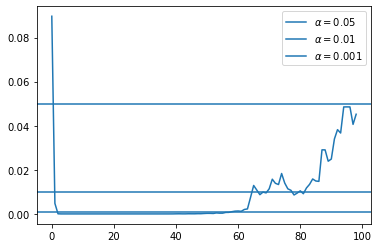

In [523]:
%matplotlib inline
plt.plot(ps)
plt.axhline(y=0.05, label=r"$\alpha=0.05$")
plt.axhline(y=0.01, label=r"$\alpha=0.01$")
plt.axhline(y=0.001, label=r"$\alpha=0.001$")
plt.legend()

In [524]:
np.where(np.array(ps) < 0.05)[0].min() + 1, np.where(np.array(ps) < 0.05)[0].max() + 1

(2, 99)

In [525]:
np.where(np.array(ps) < 0.01)[0].min() + 1, np.where(np.array(ps) < 0.01)[0].max() + 1

(2, 82)

In [526]:
np.where(np.array(ps) < 0.001)[0].min() + 1, np.where(np.array(ps) < 0.001)[0].max() + 1

(3, 58)

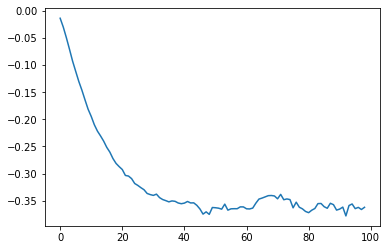

In [527]:
plt.plot(rs)

In [529]:
%matplotlib qt
plt.plot(ss)